In [37]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import plot_confusion_matrix




#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

#!{sys.executable} -m pip install -U lafrom lazypredict.Supervised import LazyClassifier, LazyRegressor

def cm_to_inch(value):
    return value/2.54

In [38]:
# carrega o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

print(dataset.head())

# periodoDemonstrativoEmMeses -> converte valores nulos ou 0 em 1
dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(np.nan, 1)
dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(0, 1)

# faturamentoBruto -> converte valores nulos em 0 
dataset['faturamentoBruto'] = dataset['faturamentoBruto'].replace(np.nan, 0)
#dataset['faturamentoBruto'] = dataset['faturamentoBruto'] / dataset['periodoDemonstrativoEmMeses']
dataset['percentualProtestos'] = dataset['percentualProtestos'].replace(np.nan, 0)

   numero_solicitacao             razaoSocial        nomeFantasia  \
0                   1  James Richardson-Patel  Alexandra Williams   
1                   2      Dr. Geoffrey Walsh   Mr. Darren Arnold   
2                   3           Joanna Hudson      Dr. David Rees   
3                   4    Gordon Jones-Hopkins    Sara Reid-Robson   
4                   5               Nigel Lee  Dr. Stanley Duncan   

         cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  percentualProtestos  \
0  KEBE17609492220843            0              0.252448                  0.0   
1  JRBK88908250677300            0              0.000000                  NaN   
2  GCVQ28531614261293            4              0.624777                  0.0   
3  KJND32266018316396           20              0.000000                  NaN   
4  CGQN15826802440348           20              0.454088                  0.0   

        primeiraCompra  prazoMedioRecebimentoVendas  titulosEmAberto  ...  \
0  2015-12-10T00:00:0

In [39]:
# carrega o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

print(dataset.head())

# periodoDemonstrativoEmMeses -> converte valores nulos ou 0 em 1
dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(np.nan, 1)
dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(0, 1)

# faturamentoBruto -> converte valores nulos em 0 
dataset['faturamentoBruto'] = dataset['faturamentoBruto'].replace(np.nan, 0)
#dataset['faturamentoBruto'] = dataset['faturamentoBruto'] / dataset['periodoDemonstrativoEmMeses']
dataset['percentualProtestos'] = dataset['percentualProtestos'].replace(np.nan, 0)
# faturamentoBruto -> remove valores nulos ou inferiores a 1.000,00 (outliers?)
dataset['faturamentoBruto'] = dataset['faturamentoBruto'].replace([np.inf, -np.inf], np.nan)
dataset.dropna(subset=['faturamentoBruto'], inplace=True)
dataset.dropna(subset=['margemBruta'], inplace=True)


   numero_solicitacao             razaoSocial        nomeFantasia  \
0                   1  James Richardson-Patel  Alexandra Williams   
1                   2      Dr. Geoffrey Walsh   Mr. Darren Arnold   
2                   3           Joanna Hudson      Dr. David Rees   
3                   4    Gordon Jones-Hopkins    Sara Reid-Robson   
4                   5               Nigel Lee  Dr. Stanley Duncan   

         cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  percentualProtestos  \
0  KEBE17609492220843            0              0.252448                  0.0   
1  JRBK88908250677300            0              0.000000                  NaN   
2  GCVQ28531614261293            4              0.624777                  0.0   
3  KJND32266018316396           20              0.000000                  NaN   
4  CGQN15826802440348           20              0.454088                  0.0   

        primeiraCompra  prazoMedioRecebimentoVendas  titulosEmAberto  ...  \
0  2015-12-10T00:00:0

In [48]:
# numero_solicitacao                                                    # irrelevante
# razaoSocial                                                           # irrelevante
# nomeFantasia                                                          # irrelevante
# cnpjSemTraco                                                          # irrelevante
# maiorAtraso                                                           # informação não existe na primeira compra
# margemBrutaAcumulada                                                  # informação não existe na primeira compra
# percentualProtestos = dataset['percentualProtestos']                  # ######## ver tratamento (abaixo)
# primeiraCompra                                                        # informação não existe na primeira compra
# prazoMedioRecebimentoVendas                                           # informação não existe na primeira compra
# titulosEmAberto = dataset['titulosEmAberto']                          # ok
# valorSolicitado                                                       # irrelevante
# status                                                                # informação não existe na primeira compra
definicaoRisco = dataset['definicaoRisco']                            # ######## ver tratamento (abaixo)
# diferencaPercentualRisco                                              # irrelevante
percentualRisco = dataset['percentualRisco']                          # ok
# dashboardCorrelacao                                                   # irrelevante
valorAprovado   = (dataset['valorAprovado'] > 0).astype(int)                                                       # informação não existe na primeira compra
# dataAprovadoEmComite                                                  # informação não existe na primeira compra (e 8415 linhas com valor nulo)
# periodoBalanco                                                        # 4240 linhas com valor nulo
# ativoCirculante                                                       # 4240 linhas com valor nulo
# passivoCirculante                                                     # 4240 linhas com valor nulo
# totalAtivo                                                            # 4240 linhas com valor nulo
# totalPatrimonioLiquido                                                # 4240 linhas com valor nulo
# endividamento                                                         # 4240 linhas com valor nulo
# duplicatasAReceber                                                    # 4240 linhas com valor nulo
# estoque                                                               # 4240 linhas com valor nulo
faturamentoBruto = dataset['faturamentoBruto']#np.log(dataset['faturamentoBruto'])
#dataset['faturamentoBruto']                          # ######## ver tratamento (abaixo)
margemBruta = dataset['margemBruta']                                    # ######## ver tratamento (abaixo)
# periodoDemonstrativoEmMeses                                           # usado para normalizar o faturamentoBruto (acima)
# custos                                                                # irrelevante
# anoFundacao                                                           # irrelevante
intervaloFundacao = dataset['intervaloFundacao']                      # ######## ver tratamento (abaixo)
# capitalSocial                                                         # irrelevante
restricoes = dataset['restricoes']                                      # ######## ver tratamento (abaixo)
empresa_MeEppMei = dataset['empresa_MeEppMei']                        # ######## ver tratamento (abaixo)
# scorePontualidade                                                     # informação não existe na primeira compra
# limiteEmpresaAnaliseCredito = dataset['limiteEmpresaAnaliseCredito']  # ######## ver tratamento (abaixo)
# dataAprovadoNivelAnalista 


In [49]:
# monta o dataset que será trabalhado
df = pd.concat([
#    faturamentoBruto,
    margemBruta,
    restricoes,
    #definicaoRisco,
    #percentualRisco
    intervaloFundacao,
    empresa_MeEppMei
], axis=1)
df=pd.get_dummies(df,columns=['intervaloFundacao'], prefix=['int_func'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8223 entries, 0 to 8963
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   margemBruta                8223 non-null   float64
 1   restricoes                 8223 non-null   object 
 2   empresa_MeEppMei           8223 non-null   object 
 3   int_func_Acima de 17 anos  8223 non-null   uint8  
 4   int_func_De 0 a 5 anos     8223 non-null   uint8  
 5   int_func_De 11 a 16 anos   8223 non-null   uint8  
 6   int_func_De 6 a 10 anos    8223 non-null   uint8  
dtypes: float64(1), object(2), uint8(4)
memory usage: 289.1+ KB


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'Nearest Neighbors': 0.9288753799392098, 'Linear SVM': 0.9276595744680851, 'RBF SVM': 0.9106382978723404, 'Naive Bayes': 0.9191489361702128}


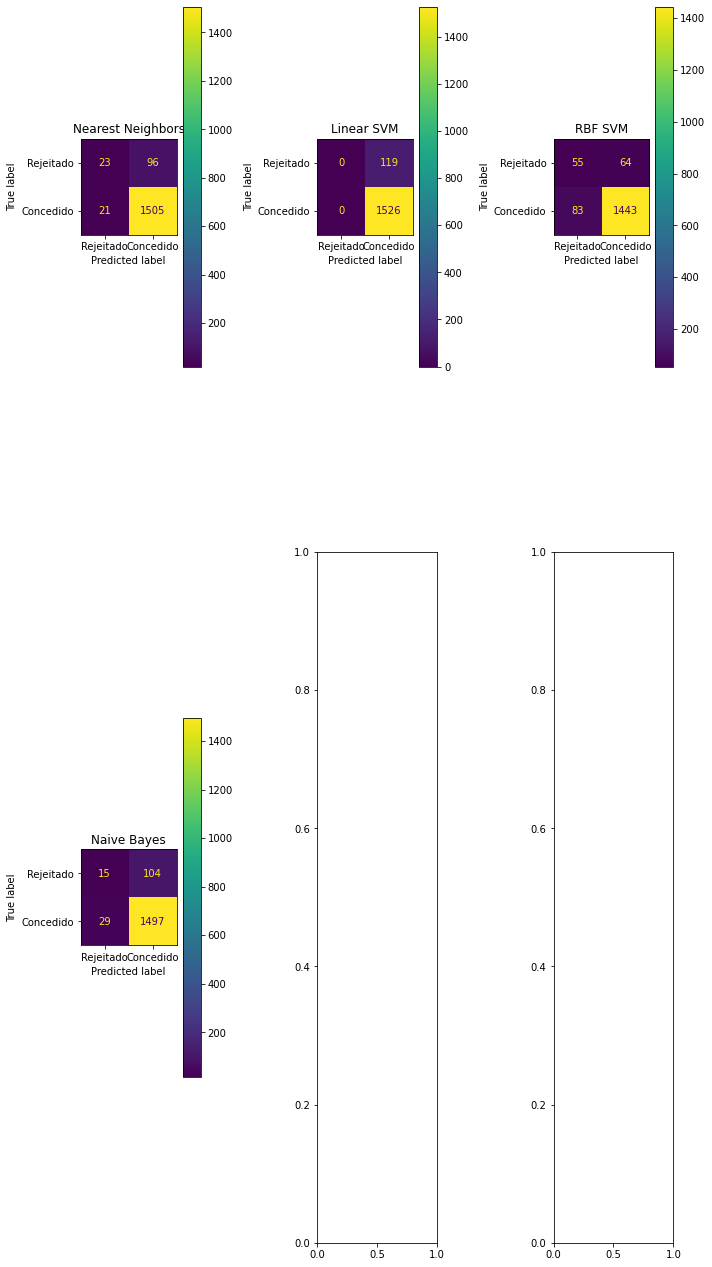

In [62]:

X = StandardScaler().fit_transform(df.values)
y = valorAprovado.values


names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         #"Decision Tree", 
         #"Random Forest", 
         #"Neural Net", 
         #"AdaBoost",
         "Naive Bayes", 
         "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
l=len(classifiers)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

class_names=['Rejeitado', 'Concedido']

scores={}





import sklearn.metrics


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,20))
for name, clf,ax in zip(names, classifiers,axes.flatten()):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores[name]=score
    plot_confusion_matrix(clf, X_test, y_test,ax=ax,
                                 display_labels=class_names)
    ax.title.set_text(name)

  
    
print (scores)
plt.tight_layout()
plt.show()  
    
    
# Linear SVM Melhor Performance    
    